# Explore here

**Campaña de Marketing Bancario**

El banco portugués está teniendo una disminución en sus ingresos, por lo que quieren poder identificar a los clientes existentes que tienen una mayor probabilidad de contratar un depósito a largo plazo. Esto permitirá que el banco centre sus esfuerzos de marketing en esos clientes y evitará perder dinero y tiempo en clientes que probablemente no se suscribirán.

In [6]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [17]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [18]:
# Verificar valores nulos en las características (X)
print(X.isnull().sum())

# Verificar valores nulos en la variable objetivo (y)
print(y.isnull().sum())


age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64
y    0
dtype: int64


In [19]:
# Eliminar filas con valores nulos
X_data = X.dropna()
y_data = y.loc[X_data.index]  # Asegurar que y tenga los mismos índices que X

# Verificar nuevamente si hay valores nulos
print(X_data.isnull().sum())  # Debe imprimir ceros en todas las columnas
print(y_data.isnull().sum())  # Debe imprimir cero si no tenía nulos originalmente


age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64
y    0
dtype: int64


In [4]:
y.shape

(45211, 1)

**ANALISIS DE VARIABLES UNIVARIANTE**

In [20]:
df=bank_marketing.data.features
df['y']=bank_marketing.data.targets
total_data = pd.concat([df,df['y']])

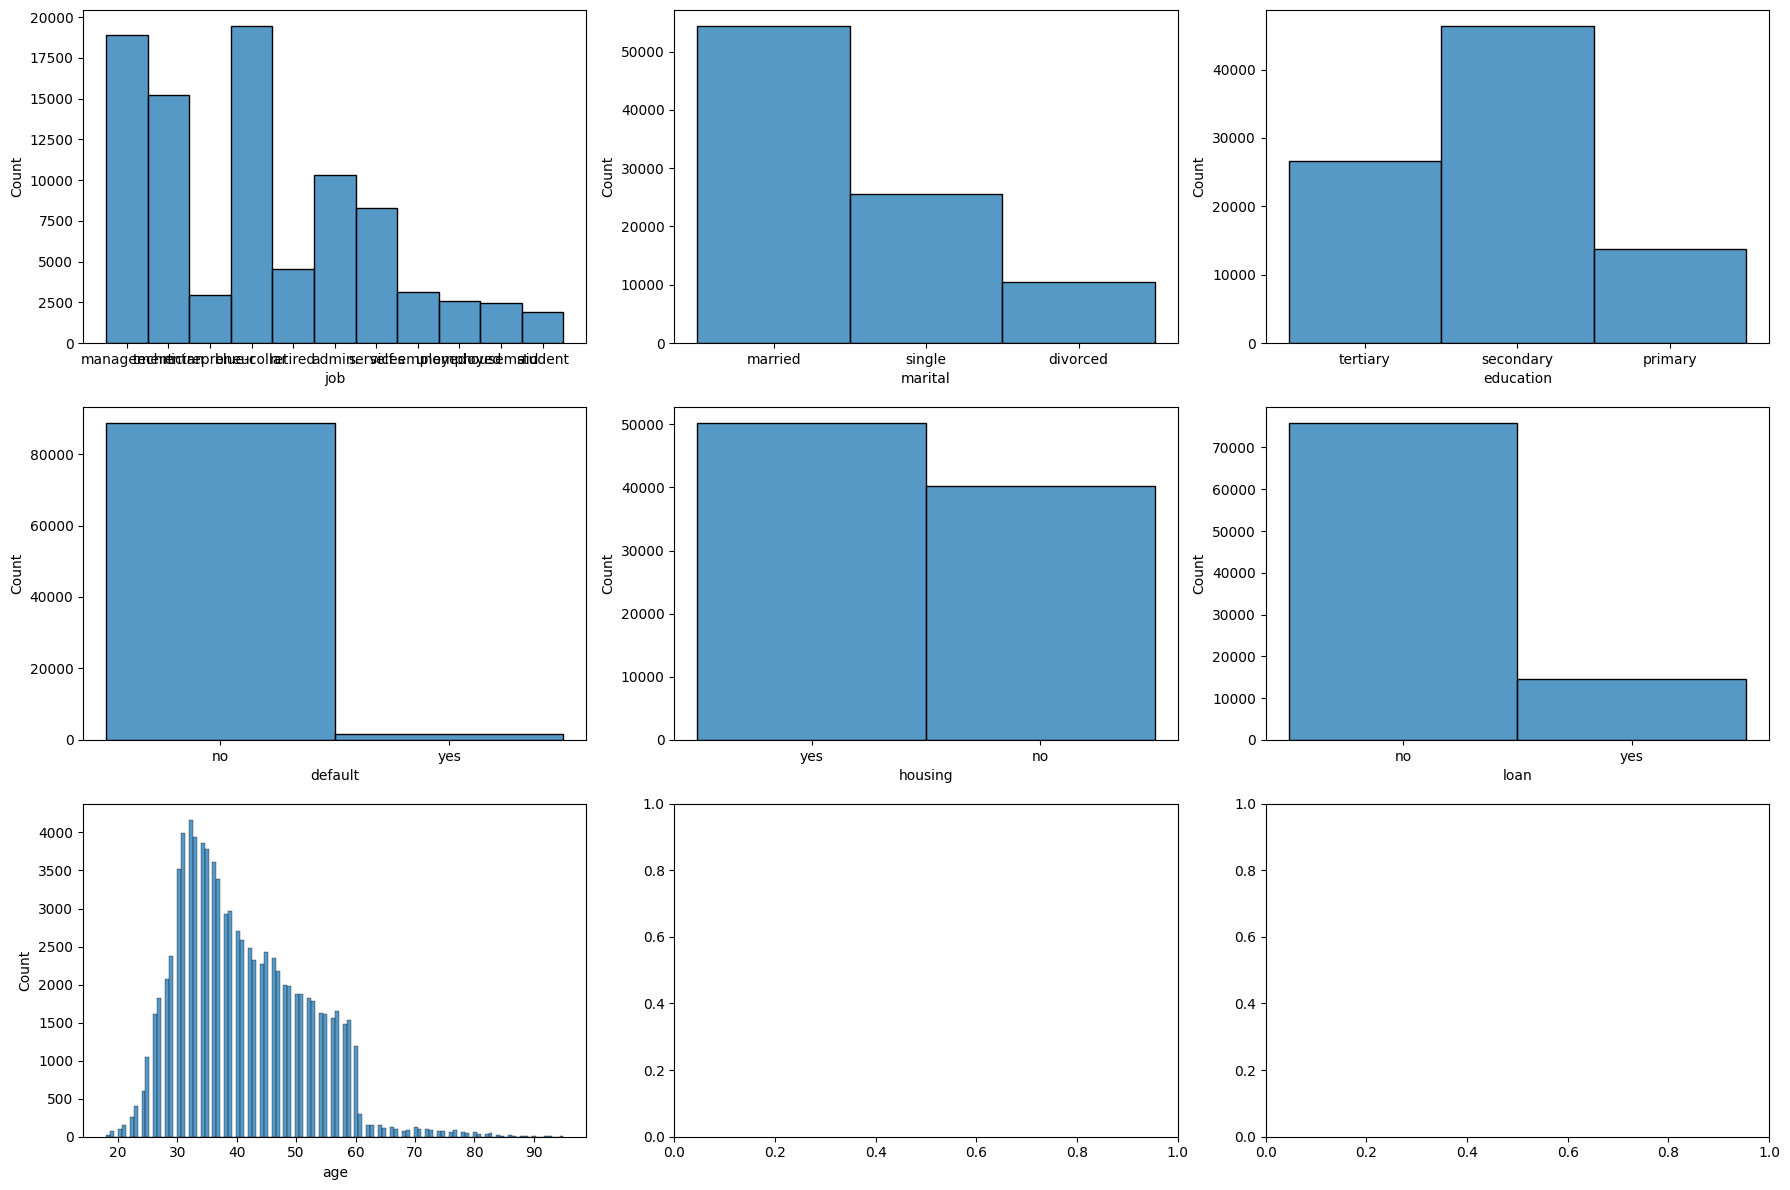

In [21]:
#Realizar graficas de relacion para ver el comportamiento de las variables

fig, axis = plt.subplots(3, 3, figsize=(18, 12))

sns.histplot (ax = axis [0, 0], data=total_data, x = 'job')
sns.histplot (ax = axis [0, 1], data=total_data, x = 'marital')
sns.histplot (ax = axis [0, 2], data=total_data, x = 'education')
sns.histplot (ax = axis [1, 0], data=total_data, x = 'default')
sns.histplot (ax = axis [1, 1], data=total_data, x = 'housing')
sns.histplot (ax = axis [1, 2], data=total_data, x = 'loan')
sns.histplot (ax = axis [2, 0], data=total_data, x = 'age')

plt.tight_layout()
plt.show()




In [22]:

total_data = pd.concat([df, df['y']])
total_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143.0,yes,no,NaN,5.0,may,261.0,1.0,-1.0,0.0,NaN,no
1,44.0,technician,single,secondary,no,29.0,yes,no,NaN,5.0,may,151.0,1.0,-1.0,0.0,NaN,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,NaN,5.0,may,76.0,1.0,-1.0,0.0,NaN,no
3,47.0,blue-collar,married,NaN,no,1506.0,yes,no,NaN,5.0,may,92.0,1.0,-1.0,0.0,NaN,no
4,33.0,NaN,single,NaN,no,1.0,no,no,NaN,5.0,may,198.0,1.0,-1.0,0.0,NaN,no


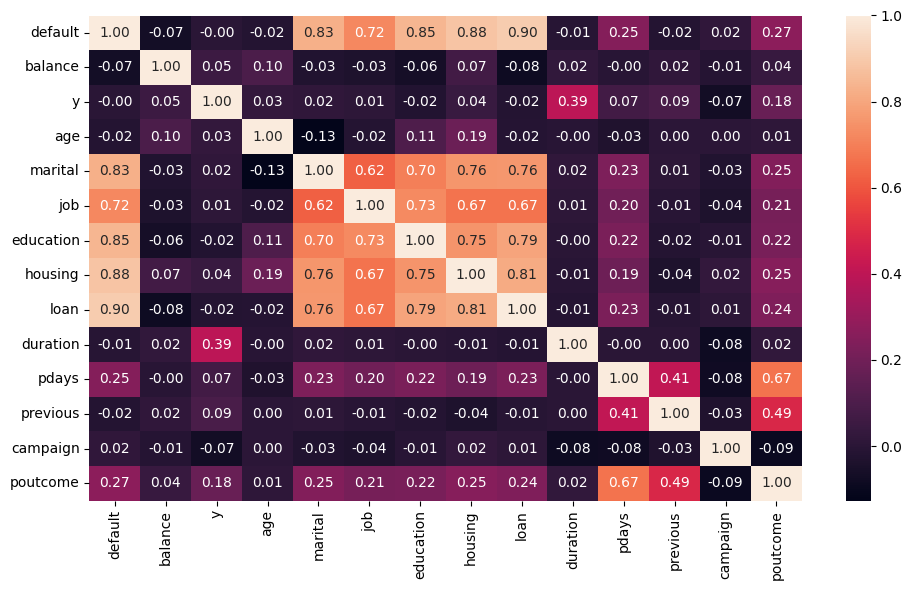

In [23]:
#Factorizamos las variables para poder trabajar con ellas
total_data["default"] = pd.factorize(total_data["default"])[0]
total_data["marital"] = pd.factorize(total_data["marital"])[0]
total_data["education"] = pd.factorize(total_data["education"])[0]
total_data["job"] = pd.factorize(total_data["job"])[0]
total_data["housing"] = pd.factorize(total_data["housing"])[0]
total_data["loan"] = pd.factorize(total_data["loan"])[0]
total_data["y"] = pd.factorize(total_data["y"])[0]
total_data["poutcome"] = pd.factorize(total_data["poutcome"])[0]
total_data["pdays"] = pd.factorize(total_data["pdays"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["default", "balance","y", "age", "marital", "job", "education", "housing", "loan", "duration", "pdays", "previous", "campaign","poutcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Con ayuda del mapa de correlación elegimos las variables que tiene mas relacion con la variable target.
**default,
marital,
housing,
loan,
pdays**

In [24]:
#Crearemos una base de datos solo con las variables que consideramos tienen mas impacto con la variable objetivo

total_data.drop(['balance','age', 'previous','education', 'job','duration','campaign','poutcome','contact', 'day_of_week','month'], axis = 1, inplace=True)
total_data.head()

,marital,default,housing,loan,pdays,y
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,0,0,0,0,0
4,1,0,1,0,0,0


In [ ]:
total_data.shape

(90422, 6)

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Dividimos el conjunto de datos en muestras de train y test
X = total_data.drop("y", axis = 1)
y = total_data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,marital,default,housing,loan,pdays
38859,-1,-1,-1,-1,-1
7162,-1,-1,-1,-1,-1
31181,-1,-1,-1,-1,-1
37225,-1,-1,-1,-1,-1
44924,0,0,1,1,539


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(18085,))

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8836604921205419

**OPTIMIZACION DE PARAMETROS CON GRID SEARCH**

In [29]:
from sklearn.model_selection import GridSearchCV

# We define the parameters that we want to adjust by hand
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

Buscamos los mejores parametros para el modelo

In [30]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


Ajustamos los parametros al modelo

In [35]:
model_grid = LogisticRegression(penalty = "l2", C = 100, solver = "lbfgs")
model_grid.fit(X_train, y_train)
y_pred_grid = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred_grid)
grid_accuracy

0.8836604921205419

**OPTIMIZACION DE PARAMETROS CON RANDOM SEARCH**

In [32]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# We define the parameters we want to adjust
hyperparams = {
    "C": np.logspace(-4, 4, 20),
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

# We initialize the random search
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=42, scoring='accuracy')

In [33]:
random_search.fit(X_train, y_train)

print(f"Best hyperparameters: {random_search.best_params_}")

Best hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(10000.0)}


In [36]:
model_random_search = LogisticRegression(penalty = "l1", C = np.float64(10000.0), solver = "liblinear")
model_random_search.fit(X_train, y_train)
y_pred_random = model_random_search.predict(X_test)

random_search_accuracy = accuracy_score(y_test, y_pred_random)
random_search_accuracy

0.8836604921205419